## 텐서플로 허브

In [1]:
# 라이브러리 호출
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from matplotlib import font_manager
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D   # 완전연결층, 최댓값풀링, 평균값풀링
from tensorflow.keras.models import Sequential                                       # 순차적으로 쌓는 모델
from tensorflow.keras.applications import ResNet50                                   # 가중치가 선행 학습된 모델
from tensorflow.keras.preprocessing.image import ImageDataGenerator                  # 크기가 다른 이미지 파일 동일한 크기로 편집

In [2]:
# 한글 출력
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams['font.family'] = font_family

In [4]:
model = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5",
                      input_shape = (224,224,3),
                      trainable = False),
        tf.keras.layers.Dense(2, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              58331648  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 58,335,746
Trainable params: 4,098
Non-trainable params: 58,331,648
_________________________________________________________________


In [5]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [6]:
# 모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = 'C:/AI/catanddog/train'
valid_dir = 'C:/AI/catanddog/validation'

# 이미지 변형 (데이터의 양이 적을 때) => 같은 데이터를 여러 각도, 방향, 위치에서 훈련시켜 데이터 수를 늘림
train = ImageDataGenerator(                     
                    rescale = 1./255.,          # 정규화 (안하면 0~255 값으로 나옴(픽셀값))
                    rotation_range = 10,        # 0~10도 범위내에서 원본 이미지 회전
                    width_shift_range = 0.1,    # 10% 비율내에서 수평으로 랜덤하게 평행 이동
                    height_shift_range = 0.1,   # 10% 비율내에서 수직으로 랜덤하게 평행 이동
                    shear_range = 0.1,          # 10% 비율내에서 원본 이미지를 임의로 변형
                    zoom_range = 0.1)           # 0.9~1.1배의 크기로 임의 확대/축소

valid = ImageDataGenerator(rescale = 1./255.)   # 검증용 데이터이기 때문에 변형 불필요.. 정규화만 !!

# 폴더 구조를 가져와서 실제 데이터를 ImageDataGenerator에 채워줌
# 이미지 정보를 포함하고 있지 않음, 설정만 해둔 상태.
train_generator = train.flow_from_directory(train_dir,                                  # 파일 위치
                                            target_size = (image_height, image_width),  # 크기
                                            color_mode = 'rgb',                         # 'grayscale':흑백, 'rgb':색상
                                            batch_size = BATCH_SIZE,                    # 배치당 생성할 이미지 개수
                                            seed = 1,                                   # 난수 랜덤한 값
                                            shuffle = True,                             # 섞기
                                            class_mode = 'categorical')                 # 'binary':클래스 2개, 'categorical':그 이상

valid_generator = valid.flow_from_directory(valid_dir,                                  
                                            target_size = (image_height, image_width),  
                                            color_mode = 'rgb',                         
                                            batch_size = BATCH_SIZE,                    
                                            seed = 7,                                   
                                            shuffle = True,                             
                                            class_mode = 'categorical')  

# Found 385 images belonging to 2 classes. : 385개의 이미지가 있고 클래스 2개
# Found 98 images belonging to 2 classes. : 98개의 이미지가 있고 클래스 2개

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [7]:
history = model.fit(train_generator,                          # 학습 데이터셋
                    epochs = 10,                              # 학습 반복횟수
                    validation_data = valid_generator,        # 테스트 데이터셋
                    verbose = 2)                              # 진행과정 출력 (0:출력x, 1:진행막대, 2:배치마다 훈련정보)

Epoch 1/10
13/13 - 46s - loss: 0.6121 - accuracy: 0.7195 - val_loss: 0.1306 - val_accuracy: 0.9592
Epoch 2/10
13/13 - 46s - loss: 0.0836 - accuracy: 0.9766 - val_loss: 0.0834 - val_accuracy: 0.9694
Epoch 3/10
13/13 - 47s - loss: 0.0493 - accuracy: 0.9870 - val_loss: 0.0745 - val_accuracy: 0.9694
Epoch 4/10
13/13 - 46s - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.0662 - val_accuracy: 0.9796
Epoch 5/10
13/13 - 47s - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0663 - val_accuracy: 0.9694
Epoch 6/10
13/13 - 46s - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0629 - val_accuracy: 0.9796
Epoch 7/10
13/13 - 46s - loss: 0.0215 - accuracy: 0.9948 - val_loss: 0.0637 - val_accuracy: 0.9796
Epoch 8/10
13/13 - 46s - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0622 - val_accuracy: 0.9796
Epoch 9/10
13/13 - 46s - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.0609 - val_accuracy: 0.9796
Epoch 10/10
13/13 - 48s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9796


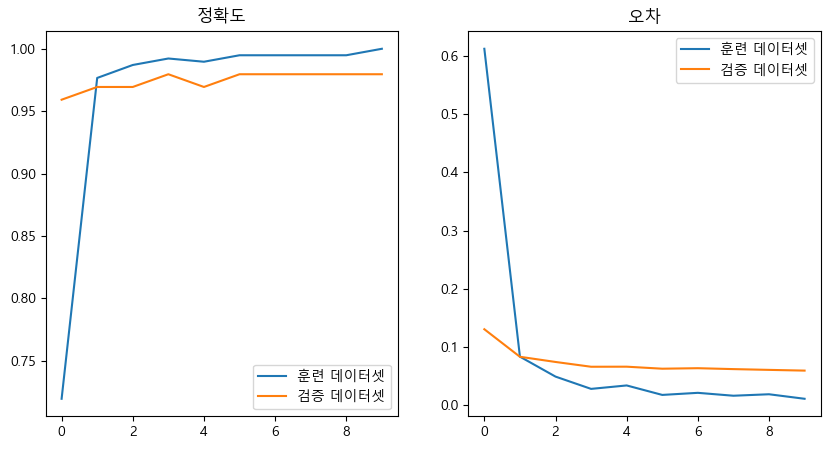

In [8]:
# 모델의 정확도 시각화

plt.rcParams['font.family'] = font_family        # 글꼴 적용

accuracy = history.history['accuracy']           # 훈련 정확도 추출
val_accuracy = history.history['val_accuracy']   # 검증 정확도 추출

loss = history.history['loss']                   # 훈련 오차 추출
val_loss = history.history['val_loss']           # 검증 오차 추출

epochs = range(len(accuracy))                    # 0~9

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, label='검증 데이터셋')
plt.legend()
plt.title('정확도')

plt.subplot(1,2,2)
plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.legend()
plt.title('오차')

plt.show()

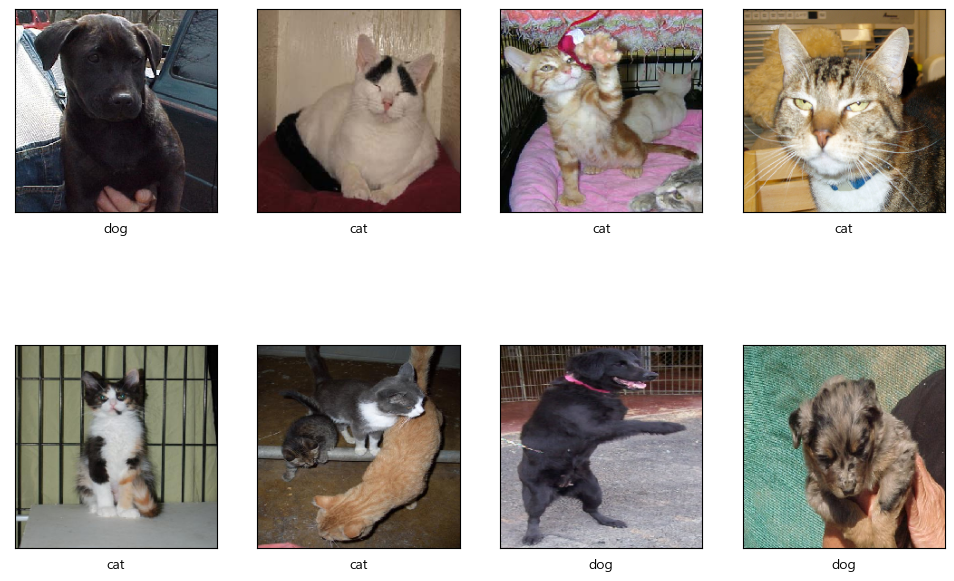

In [13]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))      # 반복(반복자(리스트 반환 가능 객체)), 
prediction_values = model.predict(validation)   # 검증데이터를 이용해서 예측 
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(validation[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[prediction_values[i]])
    
plt.show()